# Imports

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
# SSL to load seaborn example data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Locale settings
import locale
# Set to German locale to get comma decimal seperator
# Check with "locale -a" if "de_DE.utf8" is installed on your system
# Installation guide: https://ubuntuforums.org/showthread.php?t=196414
locale.setlocale(locale.LC_NUMERIC, "de_DE.utf8")

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import rgb2hex

# Tell matplotlib to use the locale
plt.rcParams['axes.formatter.use_locale'] = True

# Standard Plot Settings

In [2]:
# Plot parameters
# Style
style = "whitegrid"
# Figure sizes
standard_sizes = {
    "a4portrait": (8.27, 11.69),
    "a4landscape": (11.69, 8.27),
    "a5portrait": (5.8, 8.3),
    "a5landscape": (8.3, 5.8),
}
# Font parameters
font = "Latin Modern Roman"
font_scale = 1.5
# Figure aesthetics
grid_linestyle = "--"
yticks = True
xticks = True

In [3]:
# Colors
def RGB_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return '#%02x%02x%02x' % (red, green, blue)

def rgb_to_RGB(rgb_tuple):
    return tuple(
        [int(round(255*val, 0)) for val in rgb_tuple])

palette = sns.color_palette("colorblind")


rgb_grid = (200, 200, 200)
rgb_labels = (0, 0, 0)


hex_grid = RGB_to_hex(*rgb_grid)
hex_labels = RGB_to_hex(*rgb_labels)

print("="*10, "COLOR PALETTE", "="*10)

for color in palette:
    print(f"HEX: {rgb2hex(color)} --> RGB: {rgb_to_RGB(color)}")
    
print("\n", "="*10, "GRID", "="*10)
print(f"HEX: {hex_grid} --> RGB: {rgb_grid}")

print("\n", "="*10, "LABELS", "="*10)
print(f"HEX: {hex_labels} --> RGB: {rgb_labels}")

========== COLOR PALETTE ==========
HEX: #0173b2 --> RGB: (1, 115, 178)
HEX: #de8f05 --> RGB: (222, 143, 5)
HEX: #029e73 --> RGB: (2, 158, 115)
HEX: #d55e00 --> RGB: (213, 94, 0)
HEX: #cc78bc --> RGB: (204, 120, 188)
HEX: #ca9161 --> RGB: (202, 145, 97)
HEX: #fbafe4 --> RGB: (251, 175, 228)
HEX: #949494 --> RGB: (148, 148, 148)
HEX: #ece133 --> RGB: (236, 225, 51)
HEX: #56b4e9 --> RGB: (86, 180, 233)

 ========== GRID ==========
HEX: #c8c8c8 --> RGB: (200, 200, 200)

 ========== LABELS ==========
HEX: #000000 --> RGB: (0, 0, 0)


In [4]:
palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Line-Plot Example

In [5]:
# load seaborn example flights data
flights = sns.load_dataset("flights")

flights = flights.assign(
    year=pd.to_datetime(flights.year, format='%Y'))

flights_wide = flights.pivot(
    "year", "month", "passengers")

flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949-01-01,112,118,132,129,121,135,148,148,136,119,104,118
1950-01-01,115,126,141,135,125,149,170,170,158,133,114,140
1951-01-01,145,150,178,163,172,178,199,199,184,162,146,166
1952-01-01,171,180,193,181,183,218,230,242,209,191,172,194
1953-01-01,196,196,236,235,229,243,264,272,237,211,180,201


In [6]:
# Set seaborn parameters
rc_theme = {
    "grid.linestyle":grid_linestyle,
    "ytick.left":yticks,
    "xtick.bottom":xticks,
    "ytick.color":hex_grid,
    "xtick.color":hex_grid,
    "grid.color":hex_grid,
}

sns.set_theme(
    style=style, font=font, font_scale=font_scale, palette=palette, rc=rc_theme)

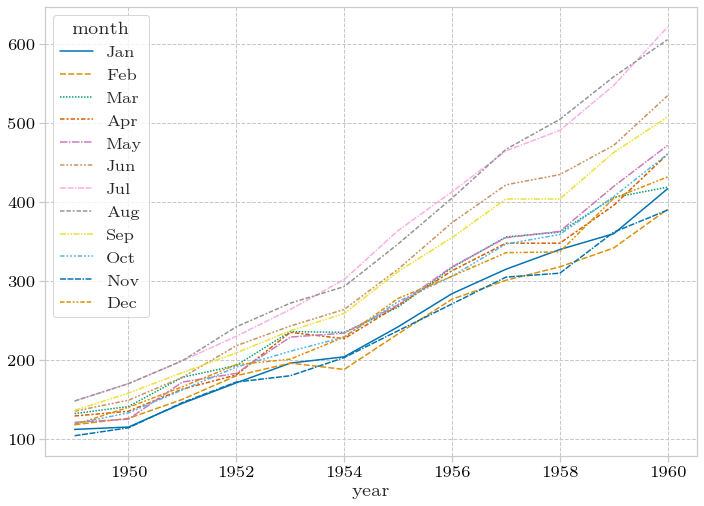

In [7]:
# Set subplot parameters
fig, ax = plt.subplots(
    figsize=standard_sizes["a4landscape"])

sns.lineplot(
    data=flights_wide, ax=ax, palette=sns.color_palette("colorblind", n_colors=12))

for label in ax.get_xticklabels():
    label.set_color(hex_labels)

for label in ax.get_yticklabels():
    label.set_color(hex_labels)

plt.show()

In [8]:
rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': True,
          'axes.formatter.use_mathtext': False,
          'axe

# Bar-Plot Example

In [9]:
# load seaborn example tip data
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


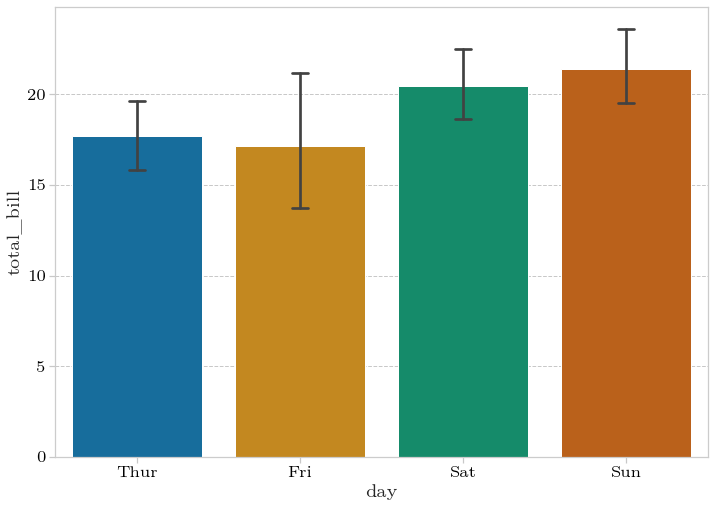

In [10]:
# Set subplot parameters
fig, ax = plt.subplots(
    figsize=standard_sizes["a4landscape"])

sns.barplot(
    x="day", y="total_bill", data=tips, ax=ax, palette=sns.color_palette("colorblind"), capsize=.1)

for label in ax.get_xticklabels():
    label.set_color(hex_labels)

for label in ax.get_yticklabels():
    label.set_color(hex_labels)

plt.show()

# Scatter-Plot Example

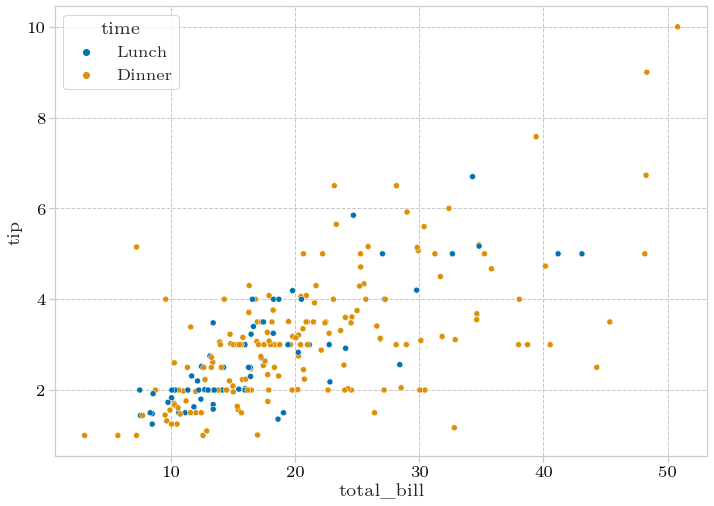

In [11]:
# Set subplot parameters
fig, ax = plt.subplots(
    figsize=standard_sizes["a4landscape"])

sns.scatterplot(
    x="total_bill", y="tip", hue="time", data=tips, ax=ax,
    palette=sns.color_palette("colorblind", n_colors=len(tips.time.unique())))

for label in ax.get_xticklabels():
    label.set_color(hex_labels)

for label in ax.get_yticklabels():
    label.set_color(hex_labels)

plt.show()